In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import librosa
import librosa.display
import IPython.display as ipd

from glob import glob
import tensorflow as tf

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
#to make plots look nice
from itertools import cycle
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_validate

In [4]:
#from google.colab import files

#upload_file = files.upload()

# Reading File

In [2]:
df = pd.read_csv('drive/MyDrive/Le_wagon/mel_spec.csv')

# Working on df

In [7]:
#df

In [3]:
emo_relation = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad',
            5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised',
            '1': 'neutral', '2': 'calm', '3': 'happy', '4': 'sad',
            '5': 'angry', '6': 'fearful', '7': 'disgust', '8': 'surprised'}

In [4]:
df = df.replace({'emotion':emo_relation})

# Defining X and y

In [13]:
X = df.drop(columns='emotion')
y= df['emotion']

In [18]:
X.shape

(11962, 16256)

In [19]:
y.shape

(11962,)

In [ ]:
#running models whole dataset

# Running models whole dataset

In [ ]:
#0 adjustment

## 0 adjustment

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
model = RandomForestClassifier(max_depth=12,min_samples_split=4,n_estimators=1000)

In [22]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, min_samples_split=4, n_estimators=1000)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.5633881303984397

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


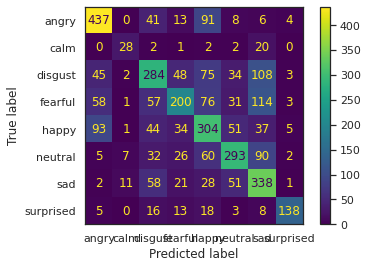

In [28]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)

In [25]:
#saving pickle
#import pickle
#filename = 'model_full.sav'
#pickle.dump(model, open(filename, 'wb'))

In [ ]:
#dropping calm and surprised

# Model dropping calm and surprised

In [5]:
df['emotion'].value_counts()

fearful      1923
angry        1923
disgust      1923
happy        1923
sad          1723
neutral      1703
surprised     652
calm          192
Name: emotion, dtype: int64

In [6]:
df2 = df[df['emotion']!='calm']
df2 = df2[df2['emotion']!='surprised']
df2['emotion'].value_counts()

fearful    1923
angry      1923
disgust    1923
happy      1923
sad        1723
neutral    1703
Name: emotion, dtype: int64

In [7]:
X2 = df2.drop(columns='emotion')
y2= df2['emotion']

In [8]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [9]:
model = RandomForestClassifier(max_depth=12,min_samples_split=4,n_estimators=1000)

In [10]:
model.fit(X_train2,y_train2)

RandomForestClassifier(max_depth=12, min_samples_split=4, n_estimators=1000)

In [13]:
y_pred2 = model.predict(X_test2)
accuracy_score(y_test2,y_pred2)

0.5638489208633094

In [14]:
y_pred2 = model.predict(X_test2)
accuracy_score(y_test2,y_pred2)

0.5638489208633094

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


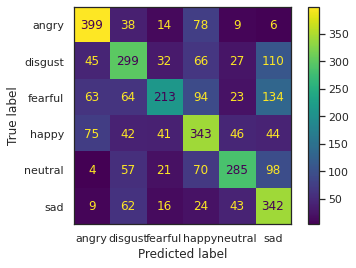

In [16]:
plot_confusion_matrix(model,X_test2,y_test2)

In [15]:
#saving pickle
#import pickle
#filename = 'model_full_calmless_surpriseless.sav'
#pickle.dump(model, open(filename, 'wb'))

In [ ]:
#getting savee out

# Model Dropping savee database (480 british entries)

In [ ]:
#savee has 480 files from the original dataset
#1920 ravdess e savee
#ou seja do 1920 até -480 = [1441:1920]

In [7]:
#df.iloc[0:1440].concat(df.iloc[1921:])
df3 = pd.concat([df.iloc[0:1440],df.iloc[1921:]])
df3 = df3[df3['emotion']!='calm']
df3 = df3[df3['emotion']!='surprised']
df3['emotion'].value_counts()


fearful    1863
disgust    1863
happy      1863
angry      1862
sad        1663
neutral    1583
Name: emotion, dtype: int64

In [8]:
df3['emotion'].value_counts()

fearful    1863
disgust    1863
happy      1863
angry      1862
sad        1663
neutral    1583
Name: emotion, dtype: int64

In [8]:
X3 = df3.drop(columns='emotion')
y3= df3['emotion']

In [9]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

In [10]:
model = RandomForestClassifier(max_depth=12,min_samples_split=4,n_estimators=1000)

In [11]:
model.fit(X_train3,y_train3)

RandomForestClassifier(max_depth=12, min_samples_split=4, n_estimators=1000)

In [12]:
y_pred3 = model.predict(X_test3)
accuracy_score(y_test3,y_pred3)

0.5816199376947041

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


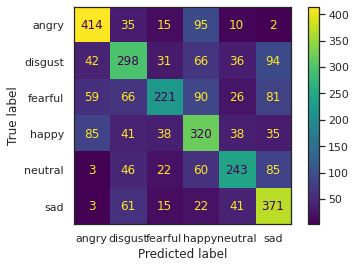

In [13]:
plot_confusion_matrix(model,X_test3,y_test3)

In [14]:
#saving pickle
#import pickle
#filename = 'model_saveeless_calmless_surpriseless.sav'
#pickle.dump(model, open(filename, 'wb'))

# Model dropping more emotions

In [19]:
#df4 = pd.concat([df.iloc[0:1440],df.iloc[1921:]]) #dropping savee
df4 = df #without dropping savee
df4 = df4[df4['emotion']!='fearful']
df4 = df4[df4['emotion']!='disgust']
df4 = df4[df4['emotion']!='calm']
df4 = df4[df4['emotion']!='surprised']
df4['emotion'].value_counts()

angry      1923
happy      1923
sad        1723
neutral    1703
Name: emotion, dtype: int64

In [20]:
X4 = df4.drop(columns='emotion')
y4= df4['emotion']

In [21]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3, random_state=42)

In [22]:
model = RandomForestClassifier(max_depth=16,min_samples_split=2,n_estimators=1000)
model.fit(X_train4,y_train4)
y_pred4 = model.predict(X_test4)
accuracy_score(y_test4,y_pred4)

0.7296058661778185

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


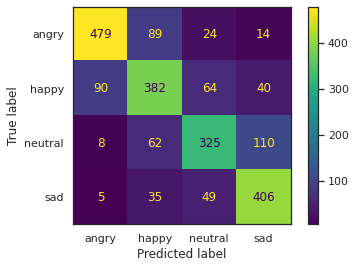

In [23]:
plot_confusion_matrix(model,X_test4,y_test4)

In [24]:
#saving pickle
import pickle
filename = 'model_four_emotions_72,96.sav'
pickle.dump(model, open(filename, 'wb'))

In [12]:
#what if we try out conv2d model

# Conv2d model

In [14]:
X4.shape

(6971, 16256)

In [13]:
X4 = np.array(X4)

In [14]:
X_conv = X4.reshape(X4.shape[0],128,127)
X_conv = np.expand_dims(X_conv,axis=3)
#y_conv=y4

(6971, 4)

In [15]:
encoder = OneHotEncoder()
a =encoder.fit_transform(df4[['emotion']])
y_conv = a.toarray()
y_conv.shape

(6971, 4)

In [16]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_conv, y_conv, test_size=0.3, random_state=42)

In [17]:
X_train5.shape

(4879, 128, 127, 1)

In [18]:
y_conv.shape

(6971, 4)

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten,MaxPool2D,Dropout

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(128, 127, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(12, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(8, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(4, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
#model.add(Dense(16, activation='relu'))
#model.add(Dense(8, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [95]:
model.compile(optimizer='Adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

In [96]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5,restore_best_weights=True)

model.fit(X_train5,
          y_train5,validation_split=0.3,epochs=50,batch_size=32,callbacks=[es])


Epoch 1/50
107/107 [==============================] - 2s 15ms/step - loss: 1.9330 - accuracy: 0.3625 - val_loss: 1.2846 - val_accuracy: 0.4686
Epoch 2/50
107/107 [==============================] - 1s 12ms/step - loss: 1.2510 - accuracy: 0.4899 - val_loss: 1.2682 - val_accuracy: 0.4768
Epoch 3/50
107/107 [==============================] - 1s 12ms/step - loss: 1.1784 - accuracy: 0.4878 - val_loss: 1.2181 - val_accuracy: 0.4570
Epoch 4/50
107/107 [==============================] - 1s 11ms/step - loss: 1.1227 - accuracy: 0.4823 - val_loss: 1.1665 - val_accuracy: 0.4932
Epoch 5/50
107/107 [==============================] - 1s 12ms/step - loss: 1.0910 - accuracy: 0.5019 - val_loss: 1.1663 - val_accuracy: 0.4781
Epoch 6/50
107/107 [==============================] - 1s 12ms/step - loss: 1.0633 - accuracy: 0.5151 - val_loss: 1.1982 - val_accuracy: 0.4713
Epoch 7/50
107/107 [==============================] - 1s 10ms/step - loss: 1.0425 - accuracy: 0.5271 - val_loss: 1.2023 - val_accuracy: 0.4761

In [97]:
y_pred5 = model.predict(X_test5)
#y_pred5[1]

66/66 [==============================] - 0s 4ms/step


In [98]:
y_pred_final =[]
for pred in y_pred5:
  if pred[0]>pred[1] and pred[0]>pred[2] and pred[0]>pred[3]:
    y_pred_final.append(np.array([1.,0.,0.,0.]))
  elif pred[1]>pred[2] and pred[1]>pred[3]:
    y_pred_final.append(np.array([0.,1.,0.,0.]))
  elif pred[2]>pred[3]:
    y_pred_final.append(np.array([0.,0.,1.,0.]))
  else:
    y_pred_final.append(np.array([0.,0.,0.,1.]))

In [99]:
#y_pred_final

In [100]:
accuracy_score(y_test5,y_pred_final)

0.6147227533460803